In [1]:
#make compatible with Python 2 and Python 3
from __future__ import print_function, division, absolute_import 

# Remove warnings
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!head -n4 data/labeledTrainData.tsv 
# use bash command to see data set structure

'head' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
# Read in the data to a Pandas data frame

import matplotlib.pyplot as plt
%matplotlib inline

import numpy as np
import pandas as pd       
train = pd.read_csv("data/labeledTrainData.tsv", header=0, \
                    delimiter="\t", quoting=3)
# train.shape should be (25000,3)


test = pd.read_csv("data/testData.tsv", header=0, \
                    delimiter="\t", quoting=3)

In [4]:
train.head()

,id,sentiment,review
0,"""5814_8""",1,"""With all this stuff going down at the moment ..."
1,"""2381_9""",1,"""\""The Classic War of the Worlds\"" by Timothy ..."
2,"""7759_3""",0,"""The film starts with a manager (Nicholas Bell..."
3,"""3630_4""",0,"""It must be assumed that those who praised thi..."
4,"""9495_8""",1,"""Superbly trashy and wondrously unpretentious ..."


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         25000 non-null  object
 1   sentiment  25000 non-null  int64 
 2   review     25000 non-null  object
dtypes: int64(1), object(2)
memory usage: 586.1+ KB


(25000, 3)

Number of Data Samples for every label output. 1=postive, 2=negative:
1    12500
0    12500
Name: sentiment, dtype: int64


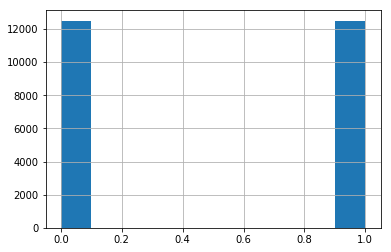

In [6]:
# 1. 
print(train.shape)
print()
print('Number of Data Samples for every label output. 1=postive, 2=negative:')
print(train.sentiment.value_counts())

train.sentiment.hist(); #class balance

In [7]:
# 2. Apply length function to the review column
lengths = train['review'].apply(len)

print('Average character length of the reviews are:')
print (np.mean(lengths))

Average character length of the reviews are:
1329.71056


In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\muska_000\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [12]:
# import packages

import bs4 as bs
import nltk
from nltk.tokenize import sent_tokenize # tokenizes sentences
import re
from nltk.stem import PorterStemmer
from nltk.tag import pos_tag
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer

eng_stopwords = stopwords.words('english')
print(eng_stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
from nltk.corpus import stopwords


def review_cleaner(review):
    '''
    Clean and preprocess a review.
    
    1. Remove HTML tags
    2. Use regex to remove all special characters (only keep letters)
    3. Make strings to lower case and tokenize / word split reviews
    4. Remove English stopwords
    5. Rejoin to one string
    '''
    
    #1. Remove HTML tags
    review = bs.BeautifulSoup(review).text
    
    #2. Use regex to find emoticons
    emoticons = re.findall('(?::|;|=)(?:-)?(?:\)|\(|D|P)', review)
    
    #3. Remove punctuation
    review = re.sub("[^a-zA-Z]", " ",review)
    
    #4. Tokenize into words (all lower case)
    review = review.lower().split()
    
    #5. Remove stopwords
    eng_stopwords = set(stopwords.words("english"))
    review = [w for w in review if not w in eng_stopwords]
    
    #6. Join the review to one sentence
    review = ' '.join(review+emoticons)
    # add emoticons to the end

    return(review)

In [14]:
%%time

num_reviews = len(train['review'])

review_clean_original = []

for i in range(0,num_reviews):
    if( (i+1)%500 == 0 ):
        # print progress
        print("Done with %d reviews" %(i+1)) 
    review_clean_original.append(review_cleaner(train['review'][i]))

Done with 500 reviews
Done with 1000 reviews
Done with 1500 reviews
Done with 2000 reviews
Done with 2500 reviews
Done with 3000 reviews
Done with 3500 reviews
Done with 4000 reviews
Done with 4500 reviews
Done with 5000 reviews
Done with 5500 reviews
Done with 6000 reviews
Done with 6500 reviews
Done with 7000 reviews
Done with 7500 reviews
Done with 8000 reviews
Done with 8500 reviews
Done with 9000 reviews
Done with 9500 reviews
Done with 10000 reviews
Done with 10500 reviews
Done with 11000 reviews
Done with 11500 reviews
Done with 12000 reviews
Done with 12500 reviews
Done with 13000 reviews
Done with 13500 reviews
Done with 14000 reviews
Done with 14500 reviews
Done with 15000 reviews
Done with 15500 reviews
Done with 16000 reviews
Done with 16500 reviews
Done with 17000 reviews
Done with 17500 reviews
Done with 18000 reviews
Done with 18500 reviews
Done with 19000 reviews
Done with 19500 reviews
Done with 20000 reviews
Done with 20500 reviews
Done with 21000 reviews
Done with 21

In [15]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import metrics # for confusion matrix, accuracy score etc
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(\
    review_clean_original, train['sentiment'], random_state=0, test_size=.2)


# CountVectorizer can actucally handle a lot of the preprocessing for us
vectorizer = CountVectorizer(analyzer = "word",   \
                             tokenizer = None,    \
                             preprocessor = None, \
                             stop_words = None,   \
                             max_features = 5000)

In [16]:
%%time
# Transform the text data to feature
# Only fit training data (to mimic real world)

vectorizer.fit(X_train)

Wall time: 5.3 s


CountVectorizer(max_features=5000)

In [17]:
# Check that it worked, 
# now we have fitted a model that can transform features
# to sparse matrix representation

print(vectorizer.get_feature_names()[:10])

['abandoned', 'abc', 'abilities', 'ability', 'able', 'abraham', 'absence', 'absent', 'absolute', 'absolutely']


In [18]:
train_bag = vectorizer.transform(X_train) #transform to a feature matrix
test_bag = vectorizer.transform(X_test)

In [20]:
type(train_bag) # sparse matrix representation

scipy.sparse.csr.csr_matrix

In [21]:
from sklearn.ensemble import RandomForestClassifier

## Initialize a Random Forest classifier with 50 trees
# hyperparameter n_estimators always set in instantiation

forest = RandomForestClassifier(n_estimators = 50)

In [22]:
# Fit the forest to the training set, using the bag of words as 
# features and the sentiment labels as the target variable

forest = forest.fit(train_bag, y_train)

In [23]:
# Make predictions

train_predictions = forest.predict(train_bag)
valid_predictions = forest.predict(test_bag)

In [24]:
metrics.accuracy_score(y_train,train_predictions) # 100% training accuracy

1.0

In [25]:
metrics.accuracy_score(y_test,valid_predictions) # 83% test

0.8392

In [26]:
# Confusion matrix
# Is the number of False Positives and True negatives approx 50/50?
metrics.confusion_matrix(y_test,valid_predictions)

array([[2164,  384],
       [ 420, 2032]], dtype=int64)

In [27]:
tn, fp, fn, tp = metrics.confusion_matrix(y_test,valid_predictions).ravel()
fp, fn

(384, 420)

In [28]:
import pickle

In [30]:
# save 
filename = 'RFModel.pkl'
pickle.dump(forest,open(filename,'wb'))

In [31]:
filename = 'FVectorizer.pkl'
pickle.dump(vectorizer,open(filename,'wb'))

In [34]:
#load the model from disk
loaded_model = pickle.load(open('RFModel.pkl','rb'))
test_bag = vectorizer.transform([review_cleaner('this was a bad movie')]).toarray()
pred = loaded_model.predict(test_bag)
pred[0]

0